Question-
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\Arati\Downloads\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [4]:
df.drop(columns=['age','job','marital','default','education','contact','day','month'], inplace=True)

In [5]:
df.head()

,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,2343,1,0,1042,1,-1,0,3,1
1,45,0,0,1467,1,-1,0,3,1
2,1270,1,0,1389,1,-1,0,3,1
3,2476,1,0,579,1,-1,0,3,1
4,184,0,0,673,2,-1,0,3,1


In [6]:
df=pd.get_dummies(df,columns=['housing','loan','poutcome'])

In [7]:
df

,balance,duration,campaign,pdays,previous,deposit,housing_0,housing_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,2343,1042,1,-1,0,1,0,1,1,0,0,0,0,1
1,45,1467,1,-1,0,1,1,0,1,0,0,0,0,1
2,1270,1389,1,-1,0,1,0,1,1,0,0,0,0,1
3,2476,579,1,-1,0,1,0,1,1,0,0,0,0,1
4,184,673,2,-1,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,257,1,-1,0,0,0,1,1,0,0,0,0,1
11158,733,83,4,-1,0,0,1,0,1,0,0,0,0,1
11159,29,156,2,-1,0,0,1,0,1,0,0,0,0,1
11160,0,9,2,172,5,0,1,0,0,1,1,0,0,0


In [11]:
df['deposit'].replace('no','0',inplace=True)
df['deposit'].replace('yes','1',inplace=True)
df

,balance,duration,campaign,pdays,previous,deposit,housing_0,housing_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,2343,1042,1,-1,0,1,0,1,1,0,0,0,0,1
1,45,1467,1,-1,0,1,1,0,1,0,0,0,0,1
2,1270,1389,1,-1,0,1,0,1,1,0,0,0,0,1
3,2476,579,1,-1,0,1,0,1,1,0,0,0,0,1
4,184,673,2,-1,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,257,1,-1,0,0,0,1,1,0,0,0,0,1
11158,733,83,4,-1,0,0,1,0,1,0,0,0,0,1
11159,29,156,2,-1,0,0,1,0,1,0,0,0,0,1
11160,0,9,2,172,5,0,1,0,0,1,1,0,0,0


In [12]:
df.columns

Index(['balance', 'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'housing_0', 'housing_1', 'loan_0', 'loan_1', 'poutcome_0',
       'poutcome_1', 'poutcome_2', 'poutcome_3'],
      dtype='object')

In [15]:
df.loc[:,['balance', 'duration', 'campaign', 'pdays', 'previous','housing_0', 'housing_1', 'loan_0', 'loan_1', 'poutcome_0','deposit']]

,balance,duration,campaign,pdays,previous,housing_0,housing_1,loan_0,loan_1,poutcome_0,deposit
0,2343,1042,1,-1,0,0,1,1,0,0,1
1,45,1467,1,-1,0,1,0,1,0,0,1
2,1270,1389,1,-1,0,0,1,1,0,0,1
3,2476,579,1,-1,0,0,1,1,0,0,1
4,184,673,2,-1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,1,257,1,-1,0,0,1,1,0,0,0
11158,733,83,4,-1,0,1,0,1,0,0,0
11159,29,156,2,-1,0,1,0,1,0,0,0
11160,0,9,2,172,5,1,0,0,1,1,0


In [16]:
df.isnull().sum()

balance       0
duration      0
campaign      0
pdays         0
previous      0
deposit       0
housing_0     0
housing_1     0
loan_0        0
loan_1        0
poutcome_0    0
poutcome_1    0
poutcome_2    0
poutcome_3    0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.iloc[:,:-1]
y = df['deposit']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [21]:
xtrain

,balance,duration,campaign,pdays,previous,deposit,housing_0,housing_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_2
3614,2027,619,2,92,2,1,1,0,1,0,0,0,1
10777,0,81,3,-1,0,0,1,0,1,0,0,0,0
9622,-253,177,1,-1,0,0,0,1,1,0,0,0,0
9506,574,137,5,-1,0,0,0,1,1,0,0,0,0
3521,197,234,1,87,3,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,744,609,1,-1,0,0,1,0,1,0,0,0,0
10955,-1451,65,5,-1,0,0,0,1,0,1,0,0,0
905,2329,131,1,-1,0,1,1,0,1,0,0,0,0
5192,985,274,2,391,11,1,0,1,1,0,0,0,1


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg = LogisticRegression()

In [24]:
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [25]:
len(xtest)

2791

In [26]:
len(ypred)

2791

In [27]:
print('Actual Y: ', ytest[:14].values)
print('Predict Y:', ypred[:14])

Actual Y:  [0 0 0 1 1 0 1 0 1 1 1 0 0 0]
Predict Y: [0 0 0 1 1 0 1 0 1 1 1 0 0 0]


In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1457
           1       1.00      1.00      1.00      1334

    accuracy                           1.00      2791
   macro avg       1.00      1.00      1.00      2791
weighted avg       1.00      1.00      1.00      2791



In [30]:
confusion_matrix(ytest,ypred)

array([[1456,    1],
       [   0, 1334]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

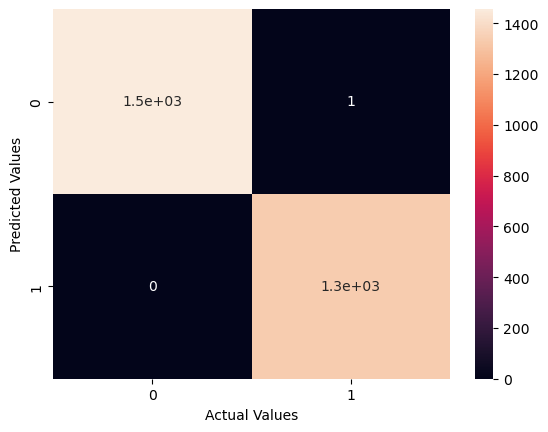

In [31]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')